In [1]:
#project goal is to build and train a regression model on the Capital Bike Share (Washington, D.C.) Kaggle data set,
#in order to predict demand for bicycle rentals at any given hour, based on time and weather,

Here the explanation of the columns in the data from Kaggle:
    
.datetime - hourly date + timestamp

.season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

.holiday - whether the day is considered a holiday

.workingday - whether the day is neither a weekend nor holiday

.weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
.temp - temperature in Celsius

.atemp - "feels like" temperature in Celsius

.humidity - relative humidity

.windspeed - wind speed

.casual - number of non-registered user rentals initiated

.registered - number of registered user rentals initiated

.count - number of total rentals

In [2]:
#pip install MarkupSafe==2.0.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#from pandas_profiling import ProfileReport

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

from sklearn.linear_model import Lasso,PoissonRegressor,LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,KBinsDiscretizer, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [4]:
#reading csv file into pandas
train = pd.read_csv('train.csv', parse_dates=True, index_col=0)#Parse_dates convert the datetime from string to date
train.head(5)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#getting the number of rows and columns
train.shape

(10886, 11)

In [6]:
#getting the visual summary distribution using Pandas profiling
#report = ProfileReport(train)
#report

## FEATURE ENGINEERING

In [7]:
#expanding the columns through day time index. this will create columns containing individual time data

In [8]:
#train['minutes_of_hour'] = train.index.minute #creating minuest of the hour

In [9]:
train['hour_of_day'] = train.index.hour #creating hours of the day

In [10]:
#creating days of the month
train['day_of_month'] = train.index.day

In [11]:
train['day_of_the_week'] = train.index.dayofweek #creating days of the week

In [12]:
train['day_of_the_year'] = train.index.dayofyear #creating days of the year

In [13]:
train['month'] = train.index.month #creating months of the year

In [14]:
train['year'] = train.index.year #creating year of the years

In [15]:
train.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,day_of_month,day_of_the_week,day_of_the_year,month,year
datetime,,,,,,,,,,,,,,,,,
2011-02-10 20:00:00,1,0,1,1,5.74,9.090,31,6.0032,4,93,97,20,10,3,41,2,2011
2012-10-09 01:00:00,4,0,1,3,14.76,17.425,87,15.0013,0,13,13,1,9,1,283,10,2012
2012-10-16 13:00:00,4,0,1,1,21.32,25.000,45,19.0012,68,260,328,13,16,1,290,10,2012
2011-01-16 14:00:00,1,0,0,1,11.48,13.635,36,16.9979,22,69,91,14,16,6,16,1,2011
2011-03-12 08:00:00,1,0,0,1,10.66,12.880,65,11.0014,9,44,53,8,12,5,71,3,2011


In [16]:
#visualisation of the times series

Text(0.5, 1.0, 'Rental by month')

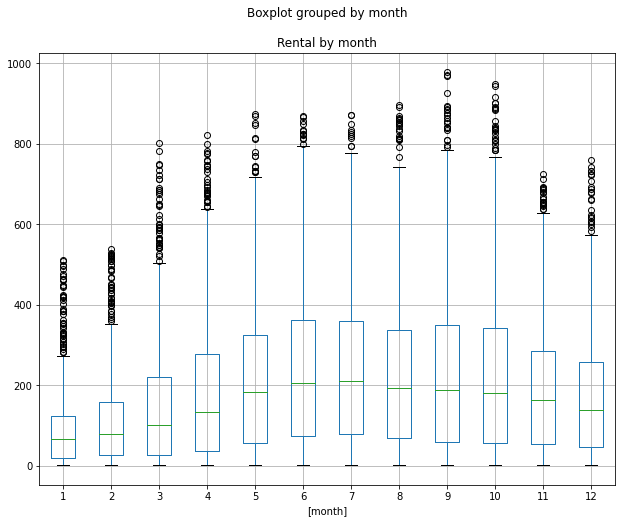

In [17]:
#visualisation of the rental bikes by month
train.boxplot(by=['month'], column='count', figsize=(10,8))
plt.title('Rental by month')

Text(0.5, 1.0, 'Rental by season')

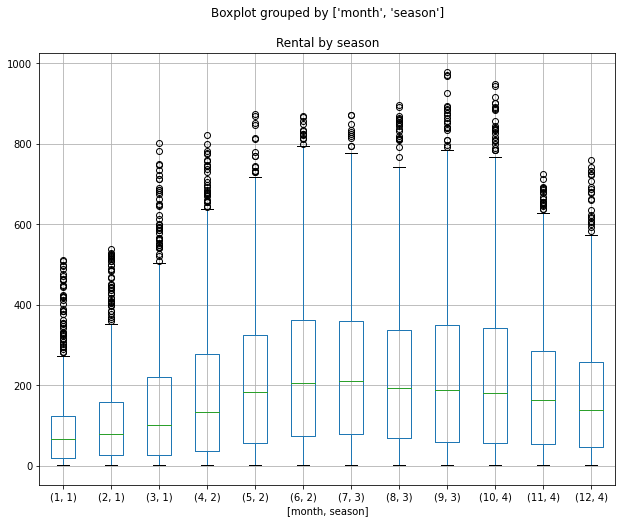

In [18]:
#visualization of the rental bikes by season
train.boxplot(by=['month','season'], column='count', figsize=(10,8))
plt.title('Rental by season')

In [19]:
#comparing casual and registered bike users visually using snsboxplot

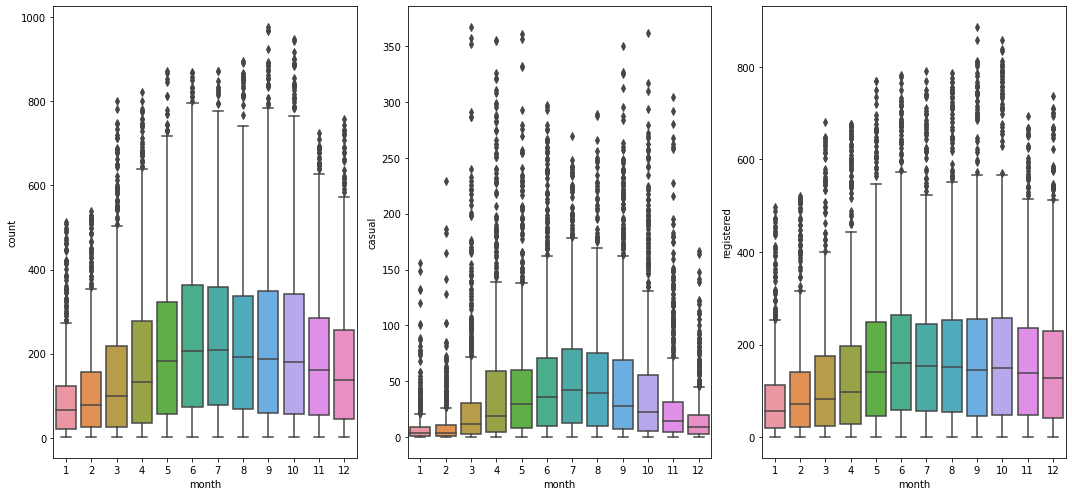

In [20]:
#fig, axs = plt.subplot(figsize=(15,7)
fig, axs = plt.subplots(1,3,figsize=(15,7))
sns.boxplot(data=train, x='month', y='count', ax=axs[0])
sns.boxplot(data=train, x='month', y='casual', ax=axs[1])
sns.boxplot(data=train, x='month', y='registered', ax=axs[2])
plt.tight_layout()

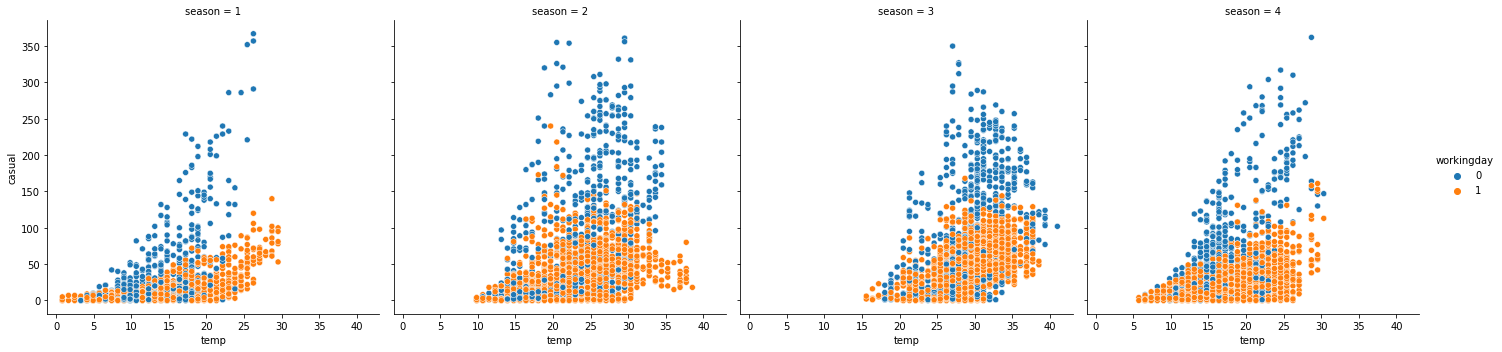

In [22]:

sns.relplot(data=train, x='temp', y='casual', col='season', 
            hue='workingday')



In [23]:
#droping the registered and casual since they are represented by count to avoid feature leakage
train.drop(['casual', 'registered'], axis=1, inplace=True)
#train.head()

In [24]:
#the summary of our data fields getting the mean, std, min and max etc
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour_of_day,day_of_month,day_of_the_week,day_of_the_year,month,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,11.541613,9.992559,3.013963,177.562466,6.521495,2011.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,6.915838,5.476608,2.004585,105.055551,3.444373,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,6.000000,5.000000,1.000000,92.000000,4.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,12.000000,10.000000,3.000000,182.500000,7.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,18.000000,15.000000,5.000000,274.000000,10.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,23.000000,19.000000,6.000000,354.000000,12.000000,2012.000000


In [25]:
#correlation of the data
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour_of_day,day_of_month,day_of_the_week,day_of_the_year,month,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.006546,0.001729,-0.010553,0.970196,0.971524,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,-0.000354,-0.015877,-0.191832,0.001134,0.001731,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,0.002780,0.009829,-0.704267,-0.003024,-0.003394,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.022740,-0.007890,-0.047692,0.011746,0.012144,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.145430,0.015551,-0.038466,0.255887,0.257589,0.061226
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.140343,0.011866,-0.040235,0.262245,0.264173,0.058540
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.278011,-0.011335,-0.026507,0.203155,0.204537,-0.078606
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,0.146631,0.036157,-0.024804,-0.148062,-0.150192,-0.015221
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.400601,0.019826,-0.002283,0.168056,0.166862,0.260403
hour_of_day,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.400601,1.000000,0.001132,-0.002925,-0.006735,-0.006818,-0.004234


<AxesSubplot:>

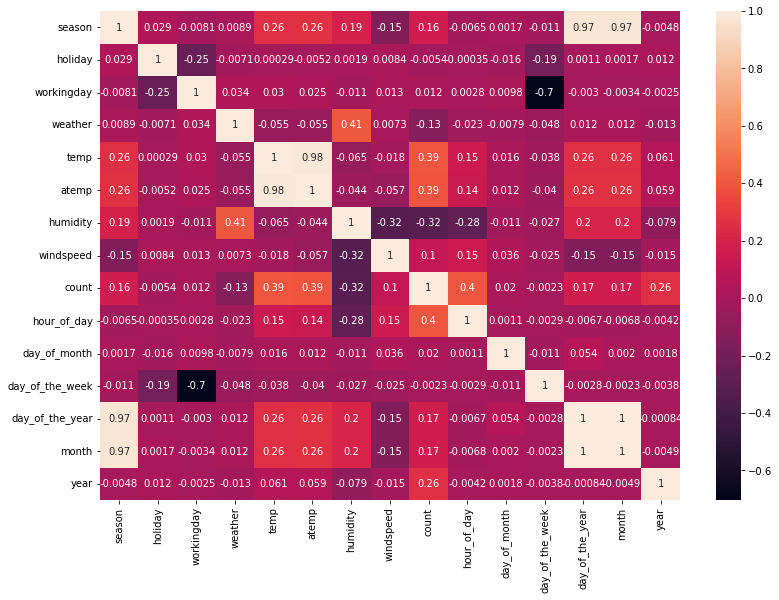

In [26]:
#getting the hetmap of the correlation
plt.figure(figsize=(13,9))
sns.heatmap(train.corr(), annot=True)

<function matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)>

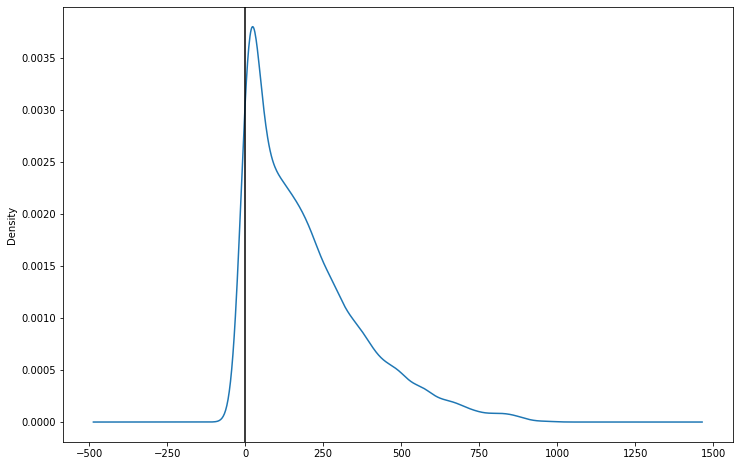

In [27]:
#visualization of the distribution
fig.axs = plt.figure(figsize=(12,8))
train['count'].plot(kind= 'density')
#plt.axvline(label='mean', color='Red' )
#plt.axvline(label='mode', color='Green' )
plt.axvline(label='median', color='Black' )
plt.boxplot,

In [28]:
#getting the boxplot of the 

In [29]:
#atemp and temp, month and day_of_the_year,  has Multi-Collinearity(strongly correlated) 
#and this is why atemp and day_of_the_year will be dropped
train.drop('atemp', axis=1, inplace=True)


In [30]:
train.sample(5)

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour_of_day,day_of_month,day_of_the_week,day_of_the_year,month,year
datetime,,,,,,,,,,,,,,
2012-11-14 03:00:00,4,0,1,1,9.84,65,15.0013,5,3,14,2,319,11,2012
2011-06-04 17:00:00,2,0,0,2,29.52,34,16.9979,344,17,4,5,155,6,2011
2011-11-10 14:00:00,4,0,1,3,14.76,87,19.0012,64,14,10,3,314,11,2011
2011-01-11 07:00:00,1,0,1,2,6.56,55,0.0000,99,7,11,1,11,1,2011
2011-10-12 20:00:00,4,0,1,3,22.14,94,7.0015,90,20,12,2,285,10,2011


In [31]:
train.shape


(10886, 14)

In [32]:
train.info() #checking the table information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           10886 non-null  int64  
 1   holiday          10886 non-null  int64  
 2   workingday       10886 non-null  int64  
 3   weather          10886 non-null  int64  
 4   temp             10886 non-null  float64
 5   humidity         10886 non-null  int64  
 6   windspeed        10886 non-null  float64
 7   count            10886 non-null  int64  
 8   hour_of_day      10886 non-null  int64  
 9   day_of_month     10886 non-null  int64  
 10  day_of_the_week  10886 non-null  int64  
 11  day_of_the_year  10886 non-null  int64  
 12  month            10886 non-null  int64  
 13  year             10886 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.5 MB


In [33]:
train.isnull().sum() #checking the NAN

season             0
holiday            0
workingday         0
weather            0
temp               0
humidity           0
windspeed          0
count              0
hour_of_day        0
day_of_month       0
day_of_the_week    0
day_of_the_year    0
month              0
year               0
dtype: int64

In [34]:
train.duplicated() #checking for duplicates

datetime
2011-01-01 00:00:00    False
2011-01-01 01:00:00    False
2011-01-01 02:00:00    False
2011-01-01 03:00:00    False
2011-01-01 04:00:00    False
                       ...  
2012-12-19 19:00:00    False
2012-12-19 20:00:00    False
2012-12-19 21:00:00    False
2012-12-19 22:00:00    False
2012-12-19 23:00:00    False
Length: 10886, dtype: bool

In [35]:
#Checking the impact of weather on demand
train.groupby('weather')[['count']].count()

,count
weather,
1,7192
2,2834
3,859
4,1


<AxesSubplot:xlabel='weather'>

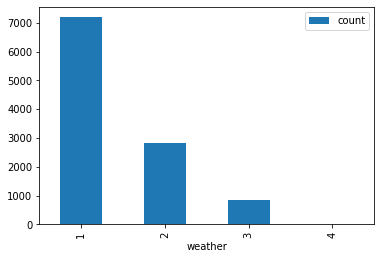

In [36]:
#visualizing the impact of weather on hiring demand
train.groupby('weather')[['count']].count().plot.bar()

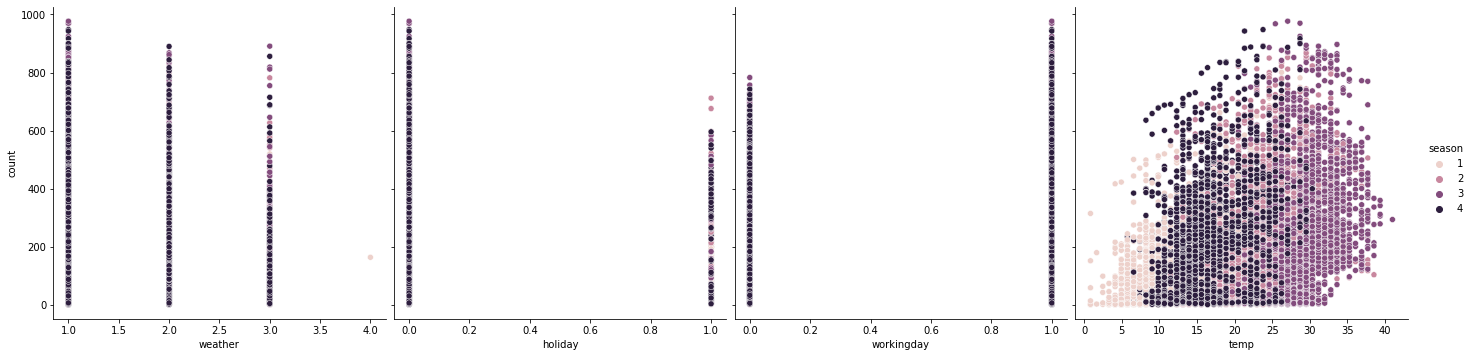

In [37]:
#using pairplot to effects of season, count and other factors
sns.pairplot(height=5, data=train, x_vars=[ 'weather', 'holiday', 'workingday', 'temp'], 
             y_vars=['count'], 
             hue='season', kind='scatter')

In [38]:
y = train['count']
X = train.drop('count', axis=1)


# train and test split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

## feature Engineering and building pipeline

In [40]:
#creating a pipeline and asking the pipeline to use standardscaler and KbinsDiscre
my_pipe = Pipeline([('my_scaller', StandardScaler()), 
                    ('my_kbins', KBinsDiscretizer())])

In [41]:
#transforming using columnTransformar

ct = ColumnTransformer([('my_pipe',my_pipe,['temp', 'humidity','windspeed']),
                        
                        ('my_onehotencoder', OneHotEncoder(handle_unknown='ignore'),['season', 'weather',
                                                              'hour_of_day',
                                                              'day_of_the_week', 
                                                              'day_of_month','year', 'month',
                                                            'holiday',  'day_of_the_year', 'workingday'])])
       

In [42]:
#Fitting and training the model
X_train_trans = ct.fit_transform(X_train)


In [43]:
X_train_trans.shape

(8708, 329)

In [44]:
X_test_trans = ct.transform(X_test)

In [45]:
X_train_trans.shape, X_test_trans.shape

((8708, 329), (2178, 329))

In [46]:
#getting the name of the features to work with
#ct.get_feature_names_out()

In [47]:
#getting the name of the features to work with and putting it in a dataframe
#pd.DataFrame(trans.todense(),columns=ct.get_feature_names_out())

# modeling

In [48]:
poisson_model = Pipeline([('ct',ct), ('polynomial',PolynomialFeatures(degree=2, include_bias=False)),
                          ('poissonRegressor', PoissonRegressor(alpha=0.05))])

In [49]:
poisson_model.fit(X_train,y_train)

/Users/Nnamdi2/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:294: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('my_pipe',
                                                  Pipeline(steps=[('my_scaller',
                                                                   StandardScaler()),
                                                                  ('my_kbins',
                                                                   KBinsDiscretizer())]),
                                                  ['temp', 'humidity',
                                                   'windspeed']),
                                                 ('my_onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season', 'weather',
                                                   'hour_of_day',
                                                   'day_of_the_week',
                                                   'day_of_month', 'year',
                                                   'month', 'holiday',
                                                   'day_of_the_year',
                                                   'workingday'])])),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('poissonRegressor', PoissonRegressor(alpha=0.05))])

In [50]:
y_predict = poisson_model.predict(X_test) #getting y_predict of the poisson model
y_predict

array([236.51935345,   3.31156052, 415.44931626, ...,   6.95584392,
       342.55013016, 218.54773249])

In [51]:
#getting the score of the poisson model
round(poisson_model.score(X_train, y_train),3),round(poisson_model.score(X_test, y_test),3)

(0.984, 0.96)

In [52]:
#getting the RMSE for test data
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_test,y_predict)),3)}')

RMSE: 39.531


In [53]:
#getting the RSMLE
print(f'RSMLE: {round(mean_squared_log_error(y_test, y_predict),3)}')

RSMLE: 0.09
